In [6]:
%config InlineBackend.figure_format = 'retina'
# %matplotlib widget

In [7]:
import matplotlib.pyplot as plt
import lsst.afw.cameraGeom as cameraGeom
from lsst.afw.cameraGeom import FOCAL_PLANE, PIXELS
from lsst.obs.lsst import LsstCamMapper
from lsst.geom import Point2D
from astropy.table import Table
import numpy as np

names = []
cenxs = []
cenys = []
c1xs = []
c1ys = []
c2xs = []
c2ys = []
c3xs = []
c3ys = []
c4xs = []
c4ys = []
nxs = []
nys = []
zeroxs = []
zeroys = []
xhatxs = []
xhatys = []
yhatxs = []
yhatys = []

camera = LsstCamMapper().camera
for det in camera:
    name = det.getName()
    names.append(name)
    center = det.getCenter(FOCAL_PLANE)
    cenxs.append(center.x)
    cenys.append(center.y)
    corners = det.getCorners(FOCAL_PLANE)
    c1xs.append(corners[0].x)
    c1ys.append(corners[0].y)
    c2xs.append(corners[1].x)
    c2ys.append(corners[1].y)
    c3xs.append(corners[2].x)
    c3ys.append(corners[2].y)
    c4xs.append(corners[3].x)
    c4ys.append(corners[3].y)
    bbox = det.getBBox()
    nxs.append(bbox.endX)
    nys.append(bbox.endY)
    transform = det.getTransform(PIXELS, FOCAL_PLANE)
    zero = transform.applyForward(Point2D(0, 0))
    zeroxs.append(zero.x)
    zeroys.append(zero.y)
    xhat = transform.applyForward(Point2D(1000, 0))
    xhatxs.append(xhat.x)
    xhatys.append(xhat.y)
    yhat = transform.applyForward(Point2D(0, 1000))
    yhatxs.append(yhat.x)
    yhatys.append(yhat.y)

lsst.CameraMapper INFO: Loading Posix exposure registry from .


In [8]:
table = Table()
table['name'] = names
table['cenx'] = np.array(cenxs, dtype=np.float32)
table['ceny'] = np.array(cenys, dtype=np.float32)
table['c1x'] = np.array(c1xs, dtype=np.float32)
table['c1y'] = np.array(c1ys, dtype=np.float32)
table['c2x'] = np.array(c2xs, dtype=np.float32)
table['c2y'] = np.array(c2ys, dtype=np.float32)
table['c3x'] = np.array(c3xs, dtype=np.float32)
table['c3y'] = np.array(c3ys, dtype=np.float32)
table['c4x'] = np.array(c4xs, dtype=np.float32)
table['c4y'] = np.array(c4ys, dtype=np.float32)
table['nx'] = np.array(nxs, dtype=np.int16)
table['ny'] = np.array(nys, dtype=np.int16)
table['zerox'] = np.array(zeroxs, dtype=np.float32)
table['zeroy'] = np.array(zeroys, dtype=np.float32)
table['xhatx'] = np.array(xhatxs, dtype=np.float32)
table['xhaty'] = np.array(xhatys, dtype=np.float32)
table['yhatx'] = np.array(yhatxs, dtype=np.float32)
table['yhaty'] = np.array(yhatys, dtype=np.float32)

In [9]:
table.write("sensors.txt", format='ascii.fixed_width', overwrite=True)

In [10]:
table[:5]

name,cenx,ceny,c1x,c1y,c2x,c2y,c3x,c3y,c4x,c4y,nx,ny,zerox,zeroy,xhatx,xhaty,yhatx,yhaty
str7,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32
R01_S00,-169.26,-296.26,-189.62,-316.26,-148.9,-316.26,-148.9,-276.26,-189.62,-276.26,4072,4000,-189.615,-316.255,-179.615,-316.255,-189.615,-306.255
R01_S01,-127.01,-296.26,-147.37,-316.26,-106.65,-316.26,-106.65,-276.26,-147.37,-276.26,4072,4000,-147.365,-316.255,-137.365,-316.255,-147.365,-306.255
R01_S02,-84.76,-296.26,-105.12,-316.26,-64.4,-316.26,-64.4,-276.26,-105.12,-276.26,4072,4000,-105.115,-316.255,-95.115,-316.255,-105.115,-306.255
R01_S10,-169.26,-254.01,-189.62,-274.01,-148.9,-274.01,-148.9,-234.01,-189.62,-234.01,4072,4000,-189.615,-274.005,-179.615,-274.005,-189.615,-264.005
R01_S11,-127.01,-254.01,-147.37,-274.01,-106.65,-274.01,-106.65,-234.01,-147.37,-234.01,4072,4000,-147.365,-274.005,-137.365,-274.005,-147.365,-264.005


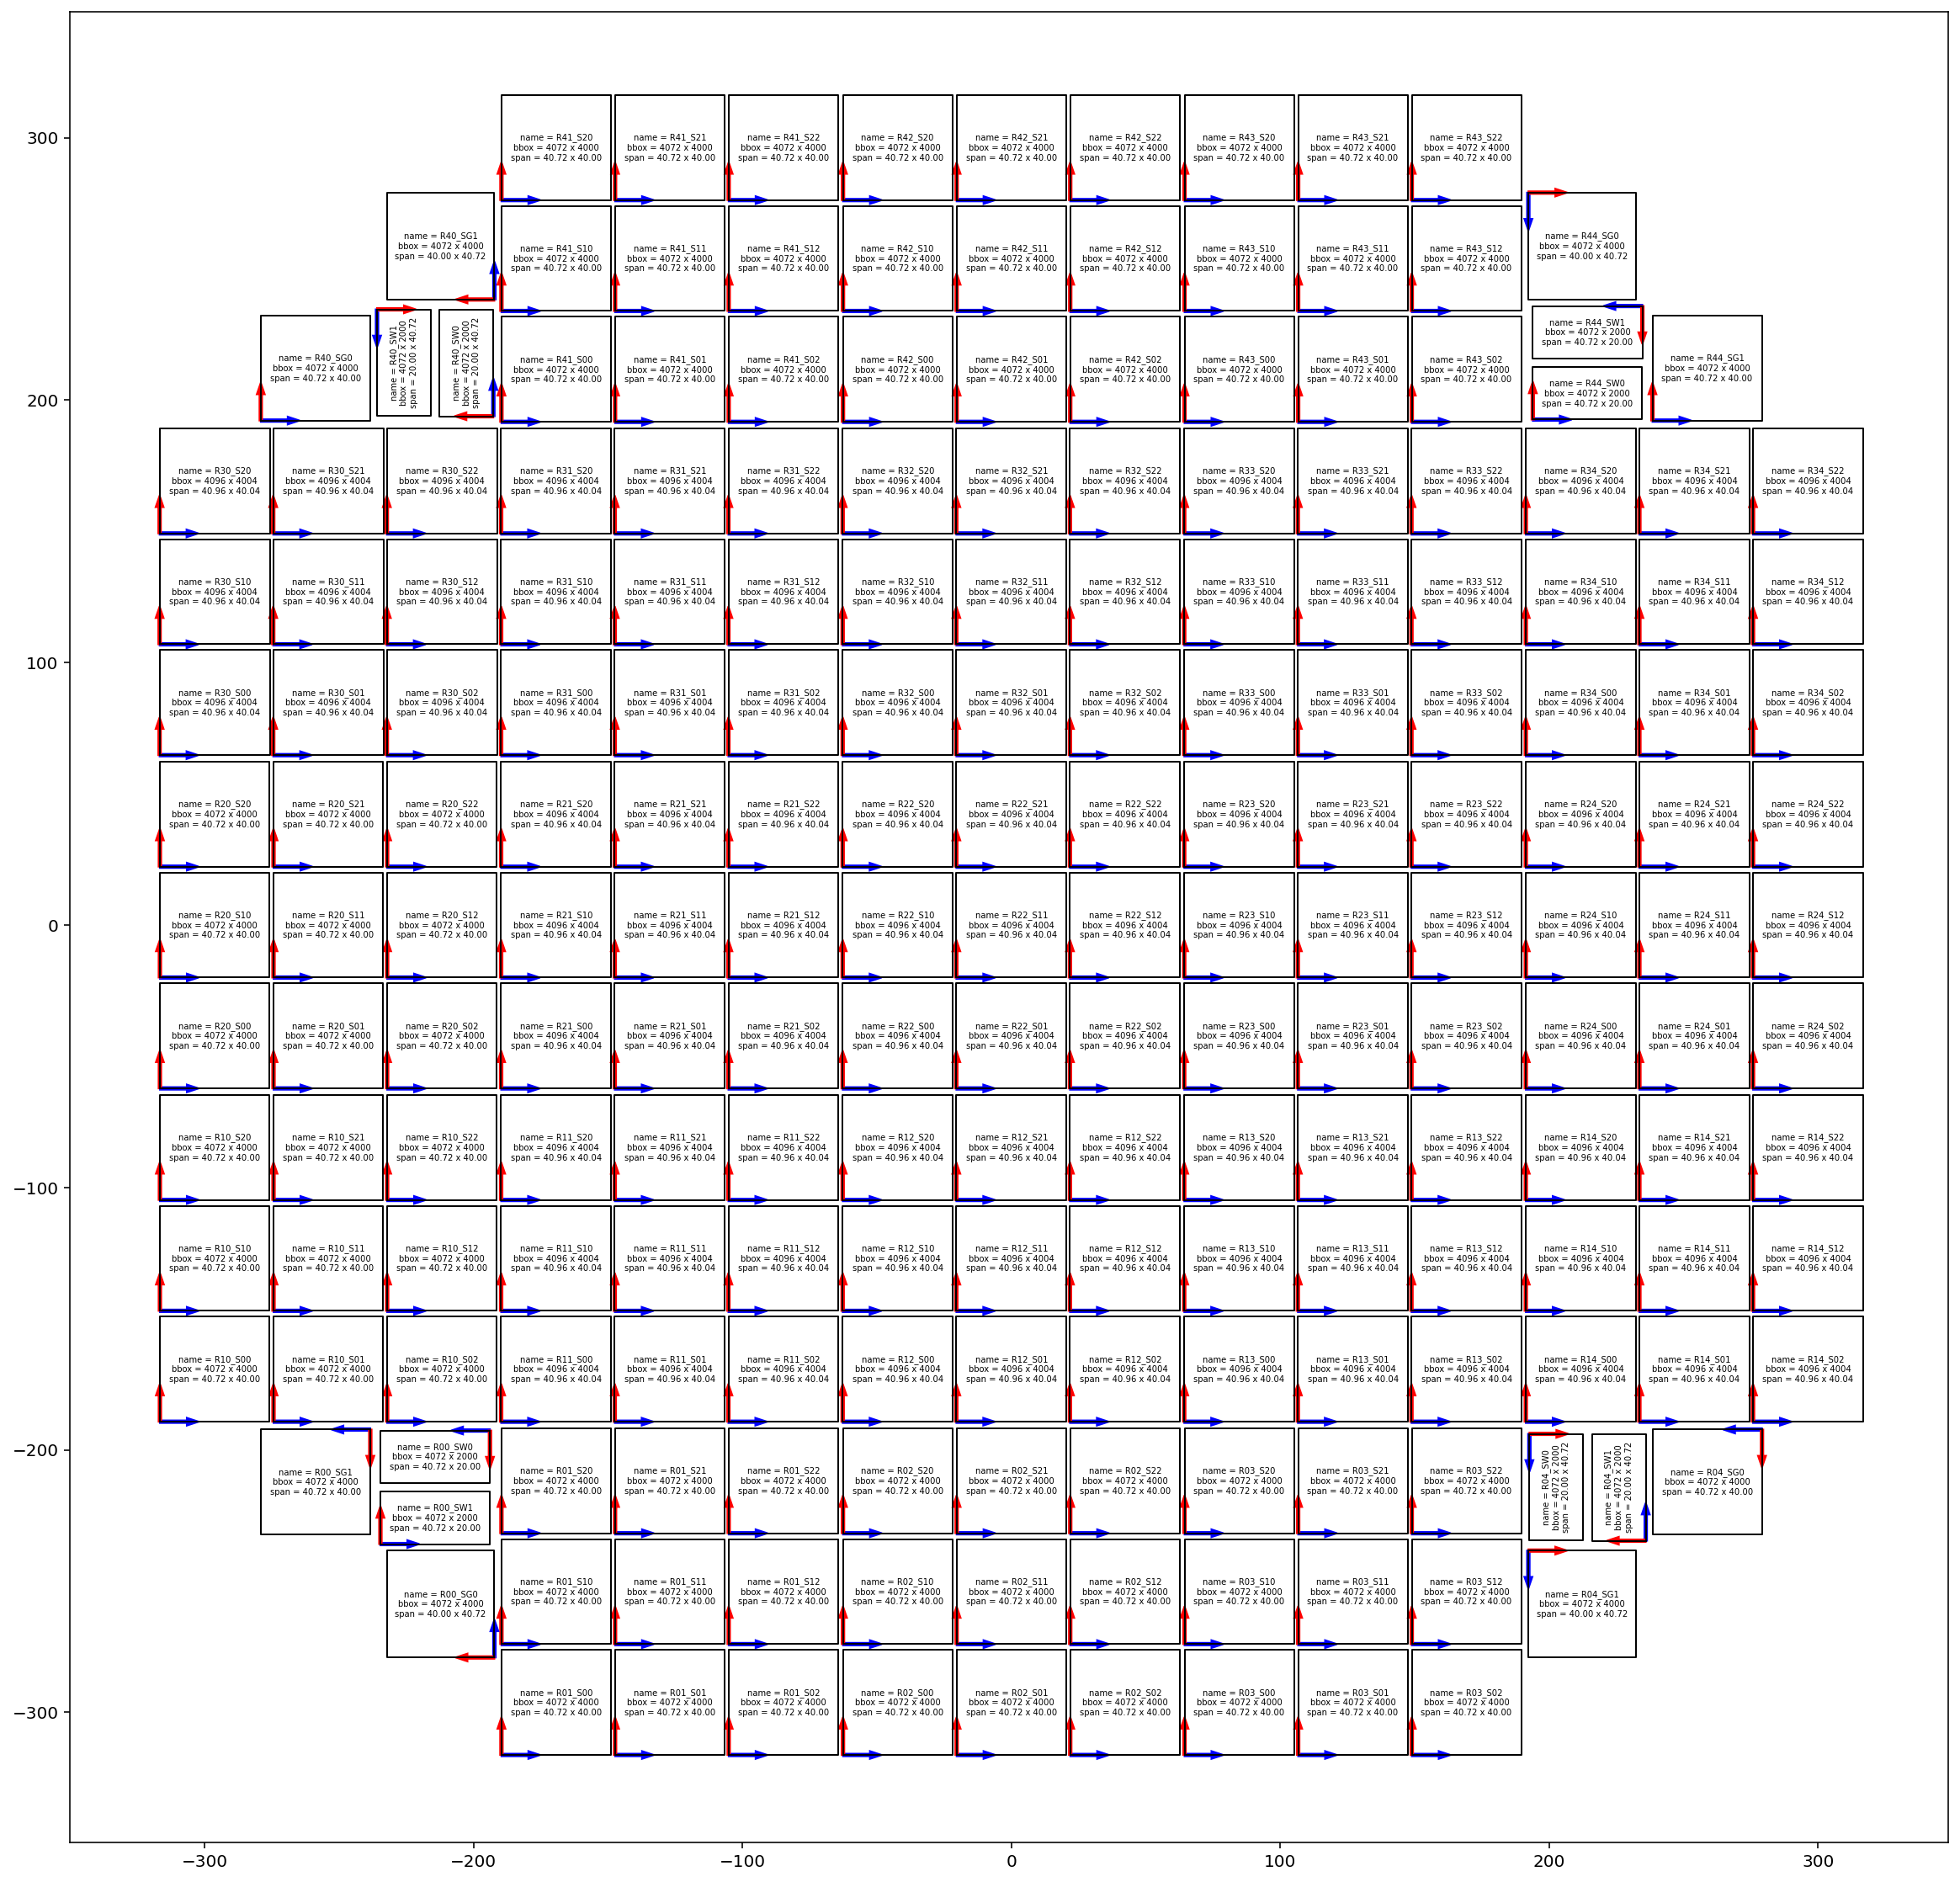

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
for row in table:
    plt.plot(
        [row['c1x'], row['c2x'], row['c3x'], row['c4x'], row['c1x']],
        [row['c1y'], row['c2y'], row['c3y'], row['c4y'], row['c1y']],
        c='k', lw=1
    )
    xspan = np.ptp([row['c1x'], row['c2x'], row['c3x'], row['c4x']])
    yspan = np.ptp([row['c1y'], row['c2y'], row['c3y'], row['c4y']])
    txt = (
        f"name = {row['name']}\n"
        f"bbox = {row['nx']} x {row['ny']}\n"
        f"span = {xspan:.2f} x {yspan:.2f}"
    )
    rotation = 'horizontal'
    if row['name'] in ['R04_SW0', 'R04_SW1', 'R40_SW0', 'R40_SW1']:
        rotation = 'vertical'
    
    plt.text(row['cenx'], row['ceny'], txt, fontsize=5, horizontalalignment='center', verticalalignment='center', rotation=rotation)    
    plt.arrow(row['zerox'], row['zeroy'], row['xhatx']-row['zerox'], row['xhaty']-row['zeroy'], color='blue', width=1)
    plt.arrow(row['zerox'], row['zeroy'], row['yhatx']-row['zerox'], row['yhaty']-row['zeroy'], color='red', width=1)
plt.show()